In [1]:
from Manuel_BayesTRPL_Utilities import *
from Manuel_BayesTRPL_Plotting import *

Files ready...
1 1
(10, 100)


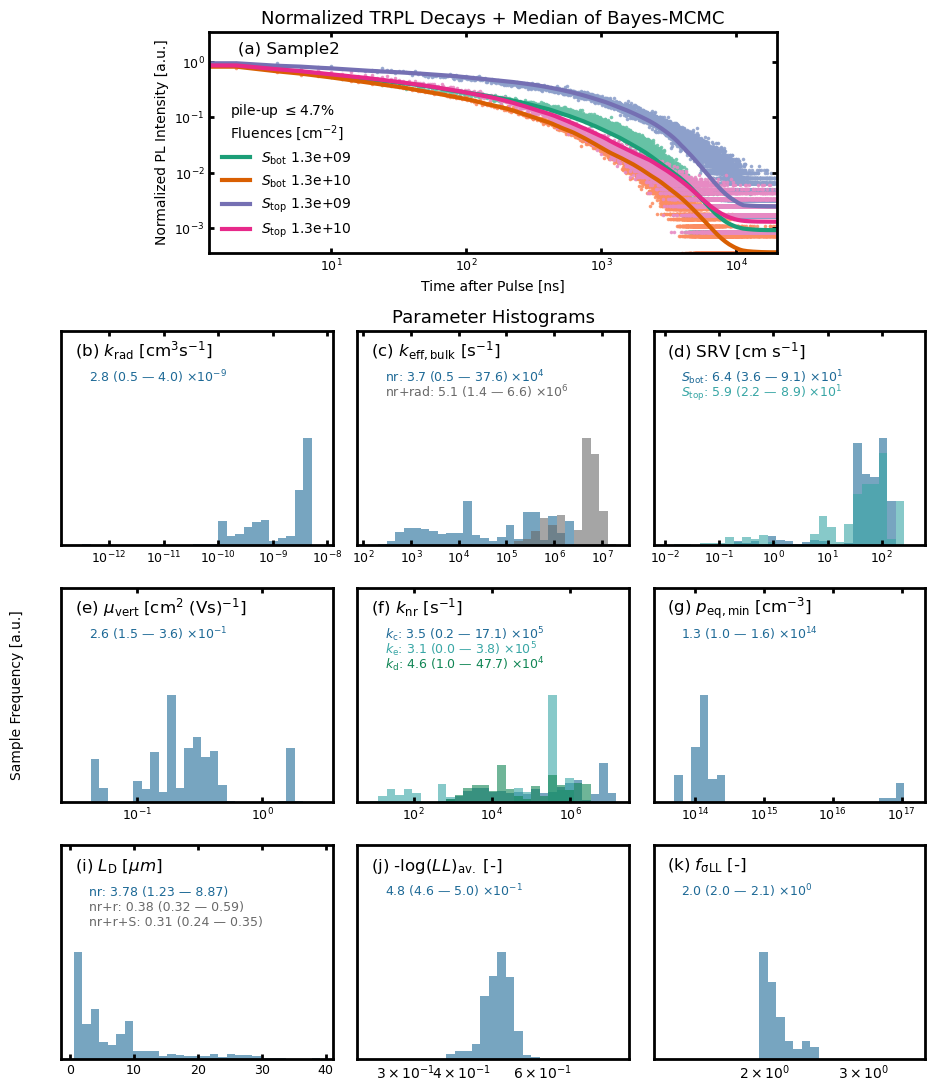

In [3]:
folder = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\Collaborations\Junke\TRPL_2024_07_10_Junke-Rahul_Chloride_additves"
trace_file = r"Sample2_trace_2025-01-10_144455.nc"

# enter names for the two sides for nicer looking labels
side_1 = 'bot'
side_2 = 'top'
SRV_display = 'topbot' # 'topbot' or 'upperlower'
scaling = 'log'

trace = az.from_netcdf(f'{folder}/{trace_file}')

filter = np.where(trace.posterior.mu_vert.values.ravel() > 0)

df, pile_up, sample_names, Fluences, Thickness, Surface, Absorption_coeff, Reflectance, intensity, max_arg, one_sun_carrier_density, spacing, bckg_list, PN_on_off, diffusion_on_off = Bayes_TRPL_Utils(folder, trace_file)
print(PN_on_off, diffusion_on_off)

df_save, test_trace = make_BayesFigure(trace_file, folder, df,  Fluences, Surface, spacing, max_arg, Thickness, scaling, one_sun_carrier_density, pile_up, side_1, side_2, SRV_display, bckg_list, PN_on_off, diffusion_on_off, filter)

In [39]:
trace = az.from_netcdf(f'{folder}/{trace_file}')

P0s = trace.posterior.P_0_list.values[:,:,3]*1e12
print(np.shape(P0s))
print('{:.2e}'.format(750e-7*P0s.max()))
print('{:.2e}'.format(1.3e9/750e-7), '{:.2e}'.format(1.3e10/750e-7))

(10, 100)
4.94e+10
1.73e+13 1.73e+14


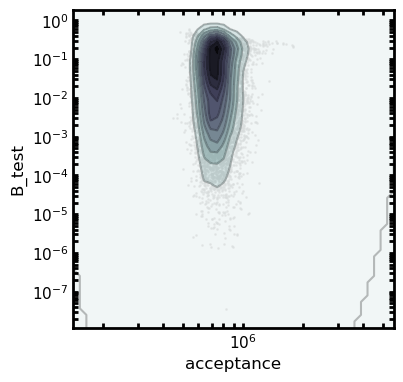

In [15]:
kd = df_save['k_emission(s-1)']
keff = df_save['k_nr_eff(s-1)']

corner_plot_single(kd, keff/kd, 'acceptance', 'B_test', ' ')